In [28]:
import pandas as pd
import json
import boto3
from boto3 import session
from boto3.dynamodb.conditions import Key, Attr

In [11]:
with open('../awsconfigs.json', 'r') as configfile:
    configs = json.loads(configfile.read())

In [32]:
# Create new session because not using default AWS Credentials in Sagemaker instance:
mysession = session.Session(aws_access_key_id=configs['AWS_ACCESS_KEY_ID'],
                           aws_secret_access_key=configs['AWS_SECRET_ACCESS_KEY'])

In [34]:
dynamodb = mysession.resource('dynamodb')

In [35]:
table = dynamodb.Table('mw-hashtag-tracker')

In [95]:
# defines projection to pull from DynamoDB table
pe = "hashtag, htCount"

In [96]:
alldata = table.scan(ProjectionExpression=pe)

In [97]:
df = pd.DataFrame.from_dict(alldata['Items'])
df.head()

,hashtag,htCount
0,mcdonalds,1
1,Legal,1
2,shipping,1
3,1234pm,9
4,GetAShot,1


In [98]:
# format columns:
df['hashtag'] = df['hashtag'].astype(str)
df['htCount'] = df['htCount'].astype(int)

In [99]:
df.sort_values(by='htCount', ascending=False, inplace=True)

In [100]:
df.head()

,hashtag,htCount
17,BoycottWalgreens,15
18,Walgreens,13
3,1234pm,9
74,BPD,9
52,HIV,4


In [101]:
# calculate proportion of total tweets with each hashtag, and set plotting labels accordingly:
sum_total = df['htCount'].sum()
df['htProp'] = df['htCount'] / sum_total
df['plot_label'] = df['hashtag']
df.loc[df['htProp'] < 0.02, 'plot_label'] = 'other'
df.head(10)

,hashtag,htCount,htProp,plot_label
17,BoycottWalgreens,15,0.112782,BoycottWalgreens
18,Walgreens,13,0.097744,Walgreens
3,1234pm,9,0.067669,1234pm
74,BPD,9,0.067669,BPD
52,HIV,4,0.030075,HIV
45,abortion,3,0.022556,abortion
28,join,2,0.015038,other
29,virtualreality,2,0.015038,other
16,DowJones,2,0.015038,other
58,artificialintelligence,2,0.015038,other


In [102]:
df_grp = df[['plot_label', 'htCount']].groupby('plot_label').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99a0852630>],
      dtype=object)

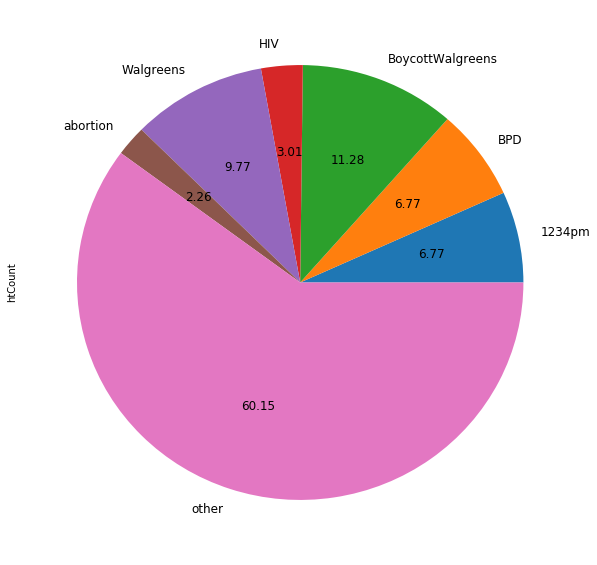

In [107]:
df_grp['htCount'].plot(kind='pie', subplots=True, 
                      autopct='%.2f', fontsize=12, figsize=(10, 10))